# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<p></p>

<div style="border:solid blue 2px; padding: 20px">

***Цель исследования:***

- Получить информацию о времени продажи квартиры.
- Найти факторы, которые большего всего влияют на стоимость квартиры.
- Изучить предложение квартир по локации.
- Выделить и получить информацию по квартирам в центре Санкт-Петербурга.

***Ход исследования:***

В файле "real_estate_data.csv" содержится архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. По каждой квартире на продажу доступны два вида данных: 1) пользовательские 2) получены автоматически на основе картографических данных.

Т.к. часть данных записаны пользователями, они могут содержать ошибки. Ошибки также могут быть и в данных, полученных автоматически на основе картографических данных. Для начала нужен обзор данных. Далее, будем делать предобработку данных. Искать аномалии, пропущенные значения и т.д..

Для решения поставленных задач необходимо рассчитать и добавить в таблицу несколько показателей:

- цена за 1 квадратный метр,
- день недели, месяц и год публикации объявления,
- этаж квартиры (первый, последний, другой).

Таким образом, исследование пройдёт в 5 этапов:

1. Обзор данных.
2. Предобработка данных.
3. Расчёты и добавление результатов в таблицу.
4. Исследовательский анализ данных.
5. Выводы


</div>

### Открываем файлы и изучаем общую информацию. 

In [1]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# открываем файл из директории или по ссылке
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [3]:
# посмотрим рандомные 10 строк
data.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5024,6,1250000.0,33.0,2017-07-25T00:00:00,1,NaN,5.0,26.0,4,NaN,...,6.0,0.0,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,71.0
12149,2,3900000.0,38.0,2018-08-15T00:00:00,1,NaN,17.0,17.4,4,NaN,...,11.5,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,26.0
1473,11,3300000.0,67.2,2018-02-22T00:00:00,3,2.50,5.0,45.4,2,NaN,...,7.0,NaN,поселок Романовка,NaN,NaN,NaN,NaN,NaN,NaN,187.0
5030,8,4900000.0,33.2,2016-02-08T00:00:00,1,2.70,7.0,17.0,6,False,...,8.6,1.0,Санкт-Петербург,27516.0,9404.0,0.0,NaN,2.0,534.0,162.0
3610,2,3790000.0,41.0,2018-02-17T00:00:00,1,2.60,10.0,17.2,7,NaN,...,8.2,2.0,Санкт-Петербург,12154.0,13108.0,1.0,209.0,1.0,542.0,38.0
13048,12,7400000.0,90.0,2017-09-13T00:00:00,4,2.50,10.0,56.0,3,NaN,...,33.0,2.0,Санкт-Петербург,26300.0,14003.0,0.0,NaN,0.0,NaN,121.0
14713,12,3700000.0,33.0,2019-01-28T00:00:00,1,2.50,12.0,18.0,12,NaN,...,7.0,NaN,Санкт-Петербург,50035.0,15740.0,1.0,780.0,0.0,NaN,19.0
4275,7,8300000.0,60.0,2015-02-12T00:00:00,2,3.15,7.0,32.0,3,False,...,12.5,0.0,Санкт-Петербург,18748.0,4341.0,0.0,NaN,0.0,NaN,813.0
9843,18,7590000.0,78.1,2018-07-10T00:00:00,3,3.30,6.0,56.5,4,False,...,11.2,NaN,Санкт-Петербург,23404.0,2945.0,0.0,NaN,0.0,NaN,28.0
15243,9,3150000.0,36.9,2018-02-22T00:00:00,1,2.50,5.0,22.0,4,NaN,...,10.0,NaN,посёлок Парголово,53106.0,23032.0,0.0,NaN,3.0,325.0,45.0


#### Описание данных:
- 	***airports_nearest*** — расстояние до ближайшего аэропорта в метрах (м)
- 	***balcony*** — число балконов
- 	***ceiling_height*** — высота потолков (м)
- 	***cityCenters_nearest*** — расстояние до центра города (м)
- 	***days_exposition*** — сколько дней было размещено объявление (от публикации до снятия)
- 	***first_day_exposition*** — дата публикации
- 	***floor*** — этаж
- 	***floors_total*** — всего этажей в доме
- 	***is_apartment*** — апартаменты (булев тип)
- 	***kitchen_area*** — площадь кухни в квадратных метрах (м²)
- 	***last_price*** — цена на момент снятия с публикации
- 	***living_area*** — жилая площадь в квадратных метрах (м²)
- 	***locality_name*** — название населённого пункта
- 	***open_plan*** — свободная планировка (булев тип)
- 	***parks_around3000*** — число парков в радиусе 3 км
- 	***parks_nearest*** — расстояние до ближайшего парка (м)
- 	***ponds_around3000*** — число водоёмов в радиусе 3 км
- 	***ponds_nearest*** — расстояние до ближайшего водоёма (м)
- 	***rooms*** — число комнат
- 	***studio*** — квартира-студия (булев тип)
- 	***total_area*** — общая площадь квартиры в квадратных метрах (м²)
- 	***total_images*** — число фотографий квартиры в объявлении

In [4]:
# посмотрим длину датасета
len(data)

23699

In [5]:
# посмотрим инфо
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [6]:
# посмотрим min, max, среднее и тд.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


***Вывод на основе описательных данных:***

1. ***last_price:*** минимальная цена квартиры 12190 руб., что явно не характерно для рынка СПб и ЛО. Похоже на ошибку. Максимальная цена 763 000 000 руб. очень большая, но для исторических/элитных объектов возможна. НО! Такие значения могут плохо влиять на среднее значение, вероятно, большие данные тоже стоит исключить.

2. ***rooms:*** минимальное число комнат 0 - ошибка. Как вариант это может быть квартира-студия. Нужно проверить.

3. ***ceiling_height:*** минимальная высота потолков 1 метр, максимальная - 100 метров. Явно ошибка. Такие значения будет удалять.

4. ***floors_total:*** max количество этажей 60 похоже на ошибку, самое высокое здание в Санкт-Петербурге и окретностях - Лахта имеет 35 этажей. Такие объекты следует удалить.

5. ***living_area:*** min жилая площадь 2 м² невозможна, ошибка. Такие объекты следует удалить.

6. ***kitchen_area:*** min площадь кухни 1,3 м² невозможна, ошибка. Такие объекты следует удалить.

7. ***airports_nearest:*** min расстояние до аэропорта 0 м невозможно. Два варианта событий: либо нет данных и заполнили нулем, либо ошибка. Такие объекты следует удалить.

8. ***days_exposition:*** минимальное количество дней размещения объявления - 1. Продажа недвижимости за 1 день или снятие объявления по другой причине - допустимый вариант, но, если таких объявлений много, то такие данные могут негативно влиять на среднее. Максимальное значение - 1580 дней (больше 4-х лет) также может негативно влиять на среднее время.

In [7]:
# проверим дубликаты и выведем их сумму
data.duplicated().sum()

0

In [8]:
# посмотрим количество пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [9]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


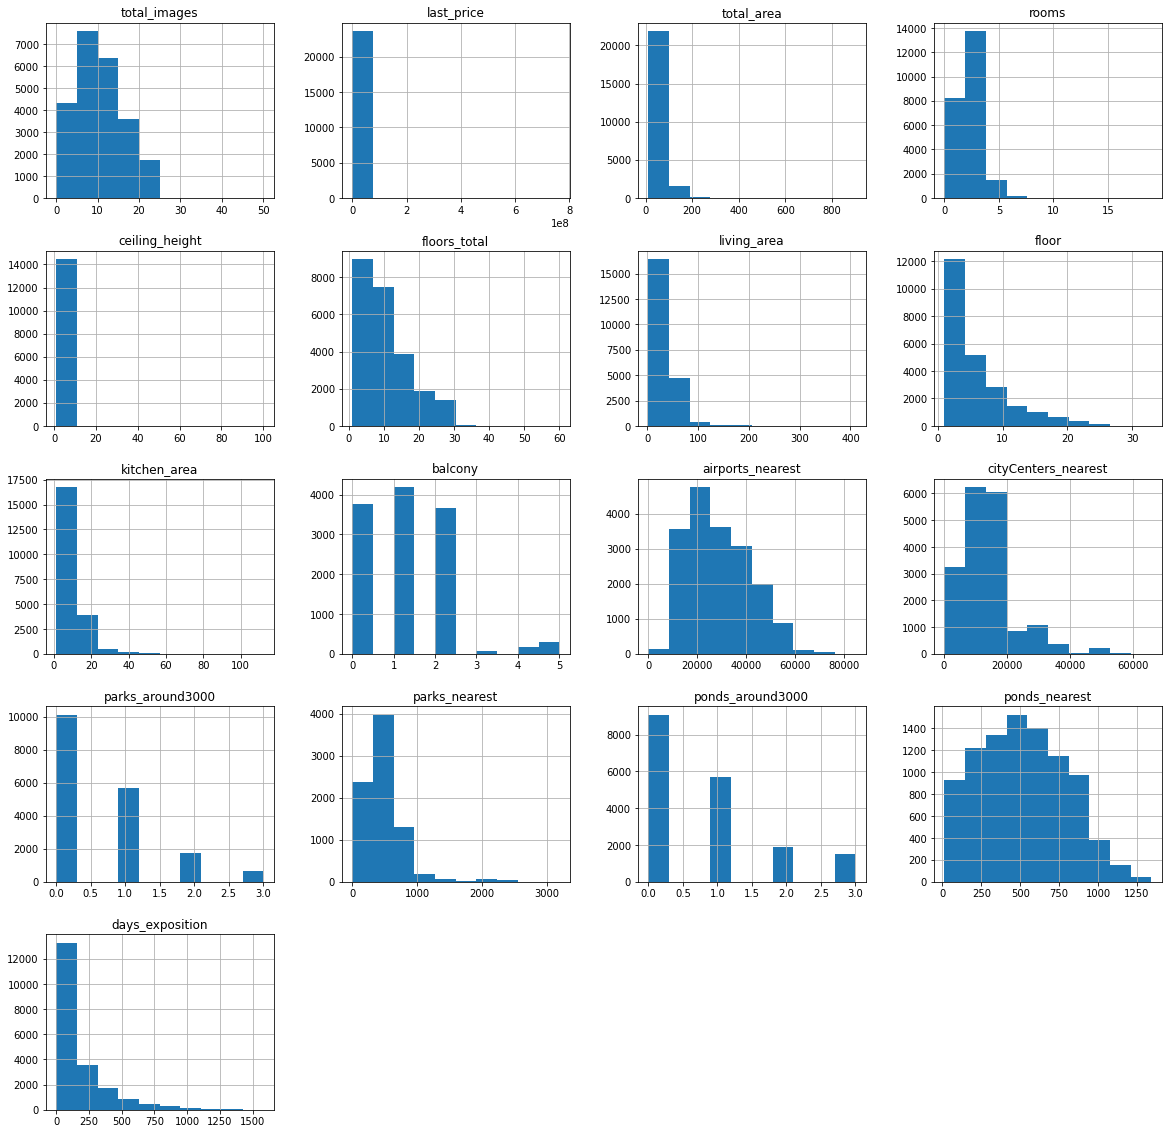

In [10]:
# построим гистораммы для датасета
data.hist(figsize=(20, 20))
plt.show()

#### ***Вывод:***
1. Прочитали файл
2. Необходимо изменить тип данных в столбцах:
- *last_price*: вещественное число float64 → int64
- *first_day_exposition*: строка object → datetime
- *floors_total*: вещественное число float64, по вводным данным целое число (этажей) → int64
- *is_apartment*: строка object, по вводным данным булев тип → bool
- *balcony*: вещественное число float64, по вводным данным целое число (балконов) → int64
- *parks_around3000*: вещественное число float64, по вводным данным целое число (парков) → int64
- *ponds_around3000*: вещественное число float64, по вводным данным целое число (водоемов) → int64
- *days_exposition*: вещественное число float64, по вводным данным целое число (дней) → int64
3. Большое количество пропусков в большинстве столбцов. Будем исправлять.
4. На основе вывода по описательным данным, будем корректировать некоторые значения.
5. Приведем названия столбцов к единому стилю.

### Предобработка данных

#### Приведем имена столбцов к единому стилю.

In [11]:
# Переименовываем
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 
                            'parks_around3000': 'parks_around_3000', 
                            'ponds_around3000': 'ponds_around_3000'})
# Проверяем
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


#### Обработка пропусков.

In [12]:
# посмотрим еще раз количество пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В 14 столбцах из 22 присутствуют пропуски:

**ceiling_height: 9195 пропусков**. Почти 40% объявлений не имеют информацию о высоте потолков, это очень большое количество. Данные по этому столбцу для нашего исследования не так важны. Но, следует принять, что для более чем трети объектов он не указан. **Пропуски оставляем.**

**floors_total: 86 пропусков**. Пропусков мало, на исследование не повлияют. **Пропуски оставляем.**

**living_area: 1903 пропуска**. Вероятно, пользователи не помнят точную площадь, поэтому не пишут ее. Кол-во пропусков менее 10%, но данные по этому столбцу нужны нам для исследования. Однако, заполнить значения нечем, **оставим пропуски.**

**is_apartment: 20924 пропусков.** Вероятно, пользователи часто не указывают тип недвижимости, если он просто жилой. Т.к. в этом столбце булев тип данных, **пропуски можно заменить на False.**

**kitchen_area: 2278 пропусков.** Вероятно, пользователи не указывают точный метраж кухни, т.к. не знают его.Кол-во пропусков менее 10%, но нам важны эти данные для исследования. Заполнить значения нечем, **оставим пропуски.**

**balcony: 11519 пропусков.** Вероятно, пользователи при отсутствии балконов их не указывают. В таком случае **заменим пропуски нулями.**

**locality_name: 49 пропусков.** Кол-во пропусков мало, на исследование не повлияют, **оставим пропуски.**

**airports_nearest: 5542 пропусков.** Вероятно, пропуски возникли в связи с отсутствием информации на картографических данных. Поэтому **пропуски оставим.**

**city_centers_nearest: 5519 пропусков.** Вероятно, пропуски возникли в связи с отсутствием информации на картографических данных. Пропуски в столбце на исследование не повлияют. Поэтому **пропуски оставим.**

**parks_around_3000: 5518 пропусков.** Число пропусков совпадает с числом пропусков в ponds_around_3000, что подозрительно. Возможно, для этих объектов не была получена информация на основе картографических данных. Пропуски в столбце на задачи исследования не влияют, **оставим их.**

**parks_nearest: 15620 пропусков.** Более половины объектов не имеют информации о ближайшем парке. Скорее всего, информация на основе картографических данных не была получена. Пропуски в столбце на задачи исследования не влияют, **оставим их.**

**ponds_around_3000: 5518 пропусков.** Число совпадает с числом пропусков parks_around_3000, что выглядит подозрительно. Скорее всего, для этих объектов не была получена информация на основе картографических данных. Пропуски в столбце на исследование не влияют, **оставим их.**

**ponds_nearest: 14589 пропусков.** Больше половины объектов не имеют информации о ближайшем парке. Скорее всего, информация на основе картографических данных не была получена. Пропуски в столбце на задачи исследования не влияют, **оставим их.**

**days_exposition: 3181 пропусков.** 13% объявлений не содержат информации о количестве дней размещения объявления, подозрительно, т.к. эти данные должны быть получены автоматом. Возможно, это техническая ошибка, которая произошла в момент сбора/выгрузки данных. Данные этого столбца важны для исследования. Заполнить значения нечем, **оставим пропуски.**

***Итог: Обработаем пропуски в столбцах is_apartment (меняем на False) и balcony (меняем на 0).***

In [13]:
# заменяем пропуски на False
data['is_apartment'].fillna(False, inplace=True)
# проверка
data['is_apartment'].isna().sum()

0

In [14]:
# заменяем пропуски на 0
data['balcony'].fillna(0, inplace=True)
# проверка
data['balcony'].isna().sum()

0

***Пропуски в столбцах is_apartment и balcony - отсутствуют.***

In [15]:
# Заполняем пропуски по высоте потолков медианным значением относительно населенных пунктов
for locality in data['locality_name'].unique():
    median_value = data.loc[data['locality_name'] == locality, 'ceiling_height'].median()
    data.loc[(data['ceiling_height'].isna()) & (data['locality_name'] == locality), 'ceiling_height'].median()

data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

In [16]:
# Заполняем пропуски по удаленности от центра медианным значением относительно населенных пунктов
for locality in data['locality_name'].unique():
    median_value = data.loc[data['locality_name'] == locality, 'city_centers_nearest'].median()
    data.loc[(data['city_centers_nearest'].isna()) & (data['locality_name'] == locality), 'city_centers_nearest'].median()

data.loc[data['city_centers_nearest'].isna(), 'city_centers_nearest'] = data['city_centers_nearest'].median()

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

#### Преобразуем типы данных

Изначально мы выделили столбцы, в которых нужно преобразовать один тип данных в другой. В ходе обработки пропусков получили, что некоторые пропуски убрать не удалось => преобразовать в другой тип(int64) также не получится. Для этих случаев оставим тип float64.

**Меняем тип в следующих столбцах last_price(int64), first_day_exposition(datetime), is_apartment(boolean), balcony(int64)**

In [17]:
# преобразуем столбцы 'last_price', 'balcony' к типу данных int
data[['last_price', 'balcony']] = data[['last_price', 'balcony']].apply(lambda x: x.astype('int64'))
# проверяем
data[['last_price', 'balcony']].dtypes

last_price    int64
balcony       int64
dtype: object

In [18]:
# преобразуем first_day_exposition к типу datetime с помощью pd.to_datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
# проверяем
data.dtypes

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around_3000              float64
parks_nearest                  float64
ponds_around_3000              float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

In [19]:
# преобразуем к булевому типу
data['is_apartment'] = data['is_apartment'].astype('boolean')
# проверка
data['is_apartment'].dtypes

BooleanDtype

In [20]:
# окончательно проверяем все столбцы
data.dtypes

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                   boolean
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around_3000              float64
parks_nearest                  float64
ponds_around_3000              float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

#### Обработка дубликатов

Явные дубликаты

In [21]:
# проверим еще раз дубликаты и выведем их сумму
data.duplicated().sum()

0

***Явных дубликатов не обнаружено***

Неявные дубликаты

In [22]:
# выведем уникальные значения locality_name
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Можно заметить что 'поселок' и 'посёлок' дублируют значения.

In [23]:
# заменяем поселок на посёлок через replace
data['locality_name'] = data['locality_name'].str.replace('поселок','посёлок')

In [24]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской посёлок Большая Ижора', 'городской посёлок Будогощь',
       'городской посёлок Виллози', 'городской посёлок Лесогорский',
       'городской посёлок Мга', 'городской посёлок Назия',
       'городской посёлок Новоселье', 'городской посёлок Павлово',
       'городской посёлок Рощино', 'городской посёлок Свирьстрой',
       'городской посёлок Советский', 'городской посёлок Фёд

Также есть повторы в названиях населенных пунктов

In [25]:
# Через replace приведем к одному значению посёлок
data = data.replace({'locality_name':{'Никольское': 'село Никольское', 'городской посёлок Советский': 'посёлок городского типа Советский', 'городской посёлок Большая Ижора': 'посёлок городского типа Большая Ижора', 'городской посёлок Лесогорский': 'посёлок городского типа Лесогорский', 'посёлок Рябово': 'посёлок городского типа Рябово', 'городской посёлок Мга': 'посёлок городского типа Мга', 'городской посёлок Павлово': 'посёлок городского типа Павлово', 'городской посёлок Назия': 'посёлок городского типа Назия', 'коттеджный посёлок Лесное': 'посёлок Лесное', 'Мурино': 'посёлок Мурино', 'Любань': 'посёлок Любань', 'городской посёлок Рощино': 'посёлок городского типа Рощино', 'деревня Кудрово': 'Кудрово'}})

In [26]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Новая Ладога', 'Отрадное', 'Павловск',
       'Петергоф', 'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск',
       'Пушкин', 'Санкт-Петербург', 'Светогорск', 'Сертолово',
       'Сестрорецк', 'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин',
       'Тосно', 'Шлиссельбург', 'городской посёлок Будогощь',
       'городской посёлок Виллози', 'городской посёлок Новоселье',
       'городской посёлок Свирьстрой', 'городской посёлок Фёдоровское',
       'городской посёлок Янино-1', 'деревня Агалатово', 'деревня Аро',
       'деревня Батово', 'деревня Бегуницы', 'деревня Белогорка',
       'деревня Большая Вруда', 'деревня Большая Пустомержа',
       'деревня Большие Колпаны', 'деревня Большое Рейзино'

In [27]:
# Удалим строки без города, они будут мешать в анализе и даже пользователям не понятно где вообще эти квартиры находятся.
data = data.dropna(subset=['locality_name'])

In [28]:
# проверим, что пропуски удалены.
data['locality_name'].isna().sum()

0

***Далее посморим на столбец с высотой потолков ceiling_height: минимальная высота потолков 1 метр, максимальная - 100 метров. Явно ошибка.***

Можно заметить, что встречаются также потолки размером 20-30 метров. Что тоже аномалия. Логично предположить, что на самом деле это вещественные значения: 2-3 метра. Следовательно нужно поделить такие значения на 10.

In [29]:
data.loc[data['ceiling_height'] >= 5, 'ceiling_height'].count()

37

In [30]:
len(data['ceiling_height'])

23650

In [31]:
# Для значений больше 20 применим деление на 10
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data['ceiling_height'] / 10

In [32]:
# Проверим
data['ceiling_height'].describe().T

count    23650.000000
mean         2.698620
std          0.253201
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

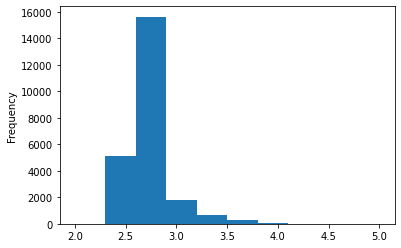

In [33]:
# Посмотрим график для наглядности
data['ceiling_height'].sort_values().plot(y = 'ceiling_height', kind = 'hist', bins = 10, range=(2,5))
plt.show()

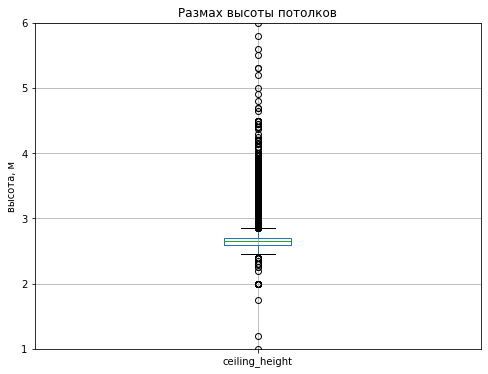

In [34]:
# Построим диаграмму размаха высоты потолков
data.boxplot(column='ceiling_height', figsize=(8, 6))
plt.title('Размах высоты потолков')
plt.ylim(1, 6)
plt.ylabel('высота, м')
plt.show()

***Из графика видно, значения менее 2,5м и более 2,8 метров - выбросы.***

In [35]:
# Оставим строки с высотой потолков от 2,5 до 5 метров
data = data.query('2.5 <= ceiling_height <= 5', engine='python')

***Посмотрим на столбец floors_total. Удалим строки с кол-вом этажей больше 30***

In [36]:
# Оставим строки с этажами < 30
data = data.query('floors_total < 30 or floors_total.isna()', engine='python')

In [37]:
data['floors_total'].max()

29.0

#### Вывод : сделали предобработку данных, а именно:
- Изменили типы данных, 
- привели имена столбцов к единому стилю, 
- обработали явные и неявные дубликаты, 
- также обработали пропуски.

### Расчёты и добавление результатов в таблицу

Произведем расчет данных и добавим их в таблицу для дальнейшего исследования

- **price_one_square_meter:** цена одного квадратного метра;
- **exposition_weekday:** день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- **exposition_month:**	месяц публикации объявления;
- **exposition_year:** год публикации объявления;
- **floor_category:** тип этажа квартиры (значения — «‎первый», «последний», «другой»);
- **city_centers_nearest_km:** расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).


#### Добавим столбец price_one_square_meter

In [38]:
# Добавим столбец с ценой за 1м²
data['price_one_square_meter'] = data['last_price'] / data['total_area']

# Округлим полученную цену до копеек
data['price_one_square_meter'] = data['price_one_square_meter'].round(2)

In [39]:
data.sample(7)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_square_meter
12962,3,9847530,69.30,2015-10-02,2,2.73,20.0,33.63,10,False,...,0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,1048.0,142100.00
7807,11,5490000,40.70,2019-04-01,1,2.70,17.0,20.30,9,False,...,1,Санкт-Петербург,34273.0,15372.0,1.0,518.0,3.0,491.0,19.0,134889.43
14563,12,6890000,48.00,2017-09-20,2,2.60,25.0,27.00,13,False,...,1,Санкт-Петербург,7026.0,13242.0,1.0,842.0,0.0,NaN,566.0,143541.67
20521,8,7000000,63.00,2017-05-29,2,2.65,7.0,34.00,3,False,...,0,Санкт-Петербург,24856.0,3704.0,0.0,NaN,1.0,932.0,63.0,111111.11
3640,5,3620000,32.85,2018-12-20,1,2.65,12.0,15.85,2,False,...,0,Санкт-Петербург,20484.0,19489.0,0.0,NaN,1.0,988.0,112.0,110197.87
10120,6,6416000,80.20,2018-11-06,3,2.64,18.0,51.90,1,False,...,0,Санкт-Петербург,42298.0,21614.0,0.0,NaN,1.0,575.0,84.0,80000.00
648,3,17500000,183.70,2018-07-01,11,3.40,7.0,138.80,7,False,...,0,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN,95264.02


#### Добавим столбец exposition_weekday, exposition_month, exposition_year

In [40]:
# Добавим столбец с днем недели публикации объявления
data['exposition_weekday'] = data['first_day_exposition'].dt.weekday

# Добавим столбец с месяцем публикации объявления
data['exposition_month'] = data['first_day_exposition'].dt.month

# Добавим столбец с годом публикации объявления
data['exposition_year'] = data['first_day_exposition'].dt.year

In [41]:
# Проверяем
data.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_square_meter,exposition_weekday,exposition_month,exposition_year
23694,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,4232.0,1.0,796.0,3.0,381.0,NaN,72490.85,1,3,2017
23695,14,3100000,59.00,2018-01-15,3,2.65,5.0,38.0,4,False,...,13098.5,NaN,NaN,NaN,NaN,45.0,52542.37,0,1,2018
23696,18,2500000,56.70,2018-02-11,2,2.65,3.0,29.7,1,False,...,13098.5,NaN,NaN,NaN,NaN,NaN,44091.71,6,2,2018
23697,13,11475000,76.75,2017-03-28,2,3.00,17.0,NaN,12,False,...,10364.0,2.0,173.0,3.0,196.0,602.0,149511.40,1,3,2017
23698,4,1350000,32.30,2017-07-21,1,2.50,5.0,12.3,1,False,...,13098.5,NaN,NaN,NaN,NaN,NaN,41795.67,4,7,2017


#### Добавим столбец с категоризацие по этажам floor_category

In [42]:
# Функция для категоризации этажности в доме
def get_floor_category(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

In [43]:
# Добавляем столбец с категорией этажа квартиры
data['floor_category'] = data.apply(get_floor_category, axis=1)

In [44]:
# Проверим
data.sample(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_square_meter,exposition_weekday,exposition_month,exposition_year,floor_category
12919,5,3150000,31.0,2017-04-28,1,2.50,9.0,15.0,7,False,...,0.0,NaN,0.0,NaN,57.0,101612.90,4,4,2017,другой
136,16,6500000,51.8,2018-08-01,2,3.45,6.0,25.6,2,False,...,2.0,533.0,1.0,812.0,163.0,125482.63,2,8,2018,другой
2231,12,7190000,73.0,2019-02-13,3,2.65,4.0,47.9,3,False,...,0.0,NaN,0.0,NaN,NaN,98493.15,2,2,2019,другой


#### Добавим столбец city_centers_nearest_km

In [45]:
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000)

In [46]:
data.head(4)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_square_meter,exposition_weekday,exposition_month,exposition_year,floor_category,city_centers_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0


#### Вывод: Добавили необходимые столбцы и произвели расчеты по ним. Отметим, что из-за пропусков в исходных данных, в расчетных значениях также есть пропуски. В столбце floor_category для 85 строк категория этажа могла определиться неверно (вместо последний -> другой), т.к. значения количества этажей для этих объектов отсутствуют. Учитывая то, что доля возможных ошибок крайне мала, на результаты исследования они не повлияют.

### Проведите исследовательский анализ данных

#### Изучение параметров объектов недвижимости

##### Общая площадь


In [47]:
# Посмторим описательную часть для этого столбца
data['total_area'].describe().T

count    23529.000000
mean        60.326857
std         35.579543
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

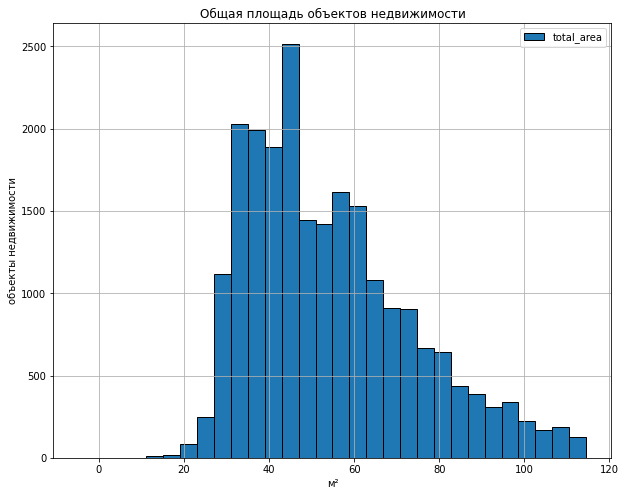

In [48]:
# Рассчитаем Q1, Q3 и IQR чтобы построить график без выбросов
q1 = data['total_area'].quantile(.25) # первый квартиль Q1
q3 = data['total_area'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR

# Построим гистограмму площади
data['total_area'].hist(bins=30, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Общая площадь объектов недвижимости')
plt.xlabel('м²')
plt.ylabel('объекты недвижимости')
plt.show()

***Рассматриваемый диапазон до примерно 115 м², исключая выбросы. Большая часть объектов недвижимости имеют площадь от 30 до 65 м². Самый распространенный вариант - около 45 м². Площадь объектов более 100 м² встречается редко. С площадью меньше 30 м² также редкость. Среднее значение - 60 м² и медиана 52 м² сдвинуты в сторону больших значений. Их не так много, но график получается растянутым.***

##### Жилая площадь

In [49]:
# Посмторим описательную часть для этого столбца
data['living_area'].describe()

count    21640.000000
mean        34.448855
std         22.018579
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

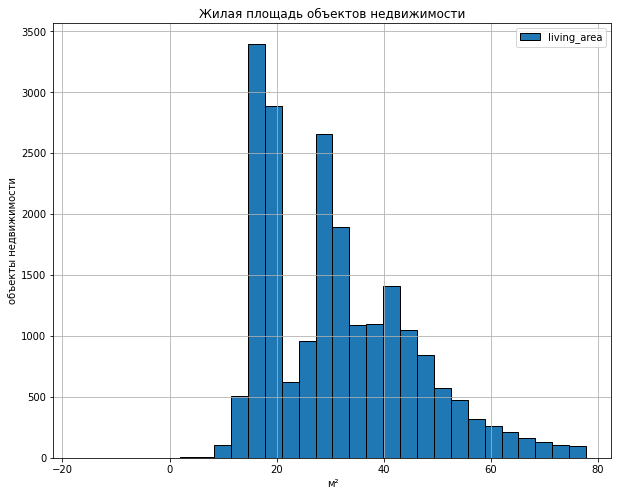

In [50]:
# Рассчитаем Q1, Q3 и IQR чтобы построить график без выбросов
q1 = data['living_area'].quantile(.25) # первый квартиль Q1
q3 = data['living_area'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR

# Построим гистограмму площади
data['living_area'].hist(bins=30, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Жилая площадь объектов недвижимости')
plt.xlabel('м²')
plt.ylabel('объекты недвижимости')
plt.show()

***Рассматриваемый диапазон до примерно 78 м², исключая выбросы. Большая часть объектов недвижимости имеют жилую площадь от 15 до 35 м². Самый распространенный вариант - около 15 м². Жилая площадь объектов более 60 м² встречается редко. С площадью меньше 15 м² также редкость. Среднее значение - 34 м², медиана 30 м². У графика также наблюдается "хвост" из-за редких, но больших значений.***

##### Площадь кухни

In [51]:
# Посмторим описательную часть для этого столбца
data['kitchen_area'].describe().T

count    21275.000000
mean        10.564766
std          5.893108
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

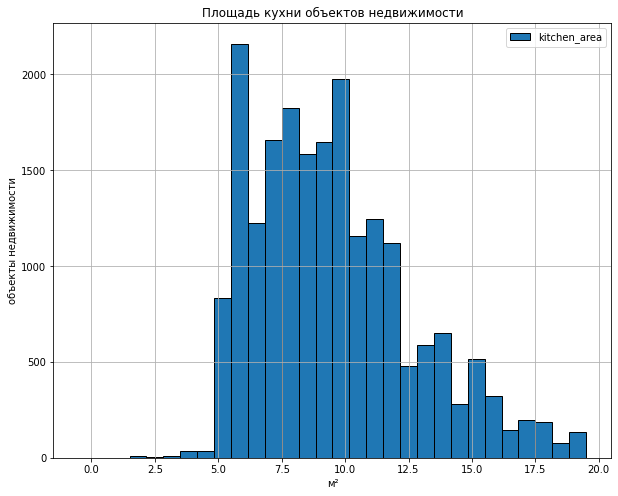

In [52]:
# Рассчитаем Q1, Q3 и IQR чтобы построить график без выбросов
q1 = data['kitchen_area'].quantile(.25) # первый квартиль Q1
q3 = data['kitchen_area'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR

# Построим гистограмму площади
data['kitchen_area'].hist(bins=30, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Площадь кухни объектов недвижимости')
plt.xlabel('м²')
plt.ylabel('объекты недвижимости')
plt.show()

***Рассматриваемый диапазон до примерно 19 м², исключая выбросы. Большая часть объектов недвижимости имеют площадь кухни от 5,5 до 12 м². Самый распространенный вариант - около 5,5 м². Площадь кухни более 13 м² встречается редко. Площадь кухни менее 5 м² также редкость. Среднее значение - 10,5 м², медиана 9,1 м². У графика также наблюдается небольшой "хвост" из-за редких, но больших значений.***

##### Цена объекта

In [53]:
# Посмторим описательную часть для этого столбца
data['last_price'].describe().T

count    2.352900e+04
mean     6.532714e+06
std      1.083989e+07
min      1.219000e+04
25%      3.415000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

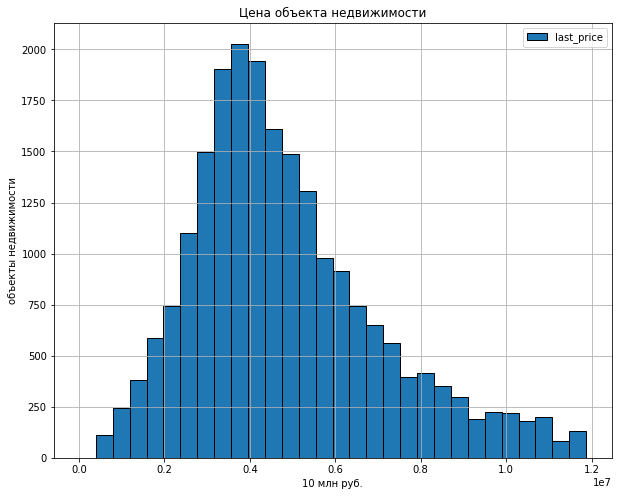

In [54]:
# Рассчитаем Q1, Q3 и IQR чтобы построить график без выбросов
q1 = data['last_price'].quantile(.25) # первый квартиль Q1
q3 = data['last_price'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR

# Построим гистограмму цены
data['last_price'].hist(bins=30, range=(0, (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Цена объекта недвижимости')
plt.xlabel('10 млн руб.')
plt.ylabel('объекты недвижимости')
plt.show()

***Рассматриваем диапазон до примерно 12 млн руб., исключая выбросы. Большинство объектов недвижимости имеют цену в пределах от 3 до 5 млн. руб.. Самый распространенный вариант - около 3.5 млн.руб.. Вариантов с ценой более 10 млн немного. 
Среднее значение - 6,5 млн, медиана 4,6 млн. У графика также наблюдается небольшой "хвост" из-за редких, но больших значений.***

##### Количество комнат

In [55]:
# Посмторим описательную часть для этого столбца
data['rooms'].describe().T

count    23529.000000
mean         2.070424
std          1.079001
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

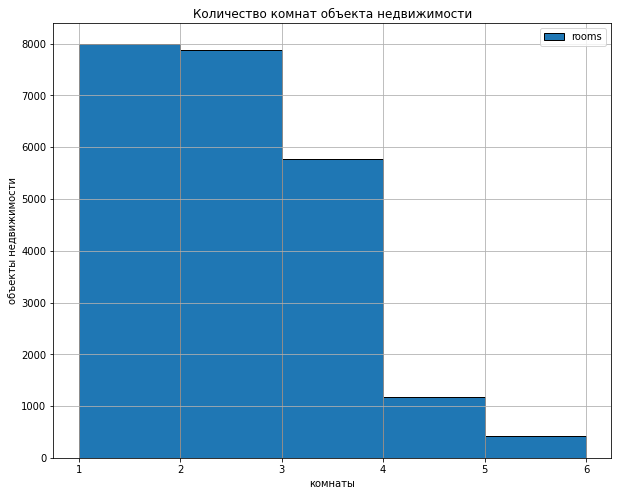

In [56]:
# Рассчитаем Q1, Q3 и IQR чтобы построить график без выбросов
q1 = data['rooms'].quantile(.25) # первый квартиль Q1
q3 = data['rooms'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR

# Построим гистограмму кол-ва комнат
data['rooms'].hist(bins=5, range=(1, (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Количество комнат объекта недвижимости')
plt.xlabel('комнаты')
plt.ylabel('объекты недвижимости')
plt.show()

***Рассматриваемый диапазон от 1 до 5 комнат, исключая некорректные значения (0 комнат) и выбросы. Большая часть объектов недвижимости имеют 1 или 2 комнаты, чуть меньше - 3 комнаты. Объектов, с кол-вом комнат 4-5 относительно немного. Среднее и медиана 2 комнаты точны. Крайне редкие значения (от 6 до 19 комнат) не оказывают существенного влияния на среднее значение.***

##### Высота потолков

In [57]:
# Посмторим описательную часть для этого столбца
data['ceiling_height'].describe().T

count    23529.000000
mean         2.697050
std          0.215023
min          2.500000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.000000
Name: ceiling_height, dtype: float64

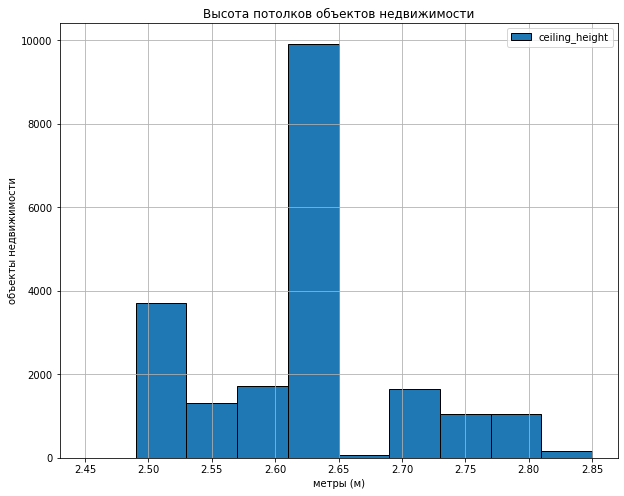

In [58]:
# Рассчитаем Q1, Q3 и IQR для построения графика без выбросов
q1 = data['ceiling_height'].quantile(.25) # первый квартиль Q1
q3 = data['ceiling_height'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR


# Построим гистограмму высоты потолков
data['ceiling_height'].hist(bins=10, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Высота потолков объектов недвижимости')
plt.xlabel('метры (м)')
plt.ylabel('объекты недвижимости')
plt.show()

***Рассматриваем диапазон от 2,5 до 2,85 м, исключая некорректные значения и выбросы. Большинство объектов недвижимости имеют высоту потолков 2,5 м и 2,65 м(большинство). Реже представлены варианты от 2,7м до 2,85 м. Среднее 2,7 м и медиана 2,65 точны.***

##### Этаж квартиры

In [59]:
# Посмторим описательную часть для этого столбца
data['floor'].describe().T

count    23529.000000
mean         5.882145
std          4.859660
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

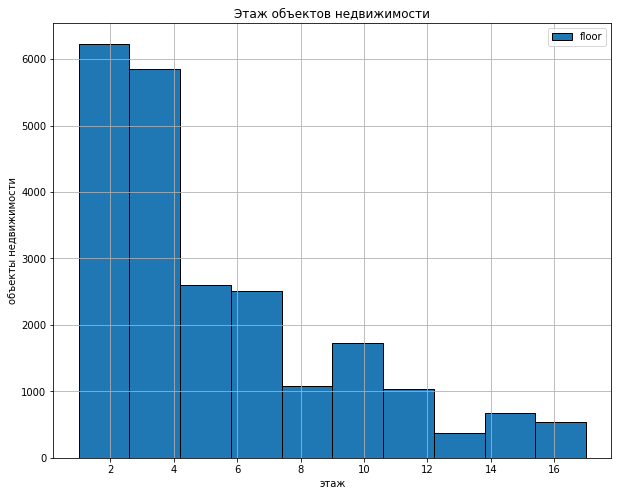

In [60]:
# Рассчитаем Q1, Q3 и IQR для построения графика без выбросов
q1 = data['floor'].quantile(.25) # первый квартиль Q1
q3 = data['floor'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR


# Построим гистограмму этажа квартиры
data['floor'].hist(bins=10, range=(1, (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Этаж объектов недвижимости')
plt.xlabel('этаж')
plt.ylabel('объекты недвижимости')
plt.show()

***Рассматриваемый диапазон с 1 по 17 этаж, исключая некорректные значения и выбросы. Большинство объектов недвижимости расположены с 1 по 4 этаж. Реже представлены варианты с 4 по 7. Среднее 5 этаж и медиана 4 этаж.***

##### Тип этажа квартиры («первый», «последний», «другой»)

In [61]:
#Вспомним как мы обозначили столбец с категоризацией по типу квартиры
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_square_meter,exposition_weekday,exposition_month,exposition_year,floor_category,city_centers_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0


In [62]:
# Вызовем describe
data['floor_category'].describe().T

count      23529
unique         3
top       другой
freq       17325
Name: floor_category, dtype: object

In [63]:
# Посмотрим на кол-во в каждой категории
data['floor_category'].value_counts()

другой       17325
последний     3307
первый        2897
Name: floor_category, dtype: int64

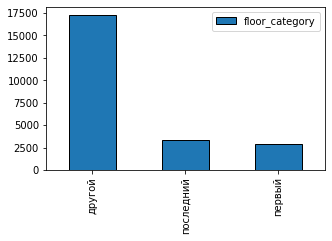

In [64]:
# Отобразим это на графике
data['floor_category'].value_counts().plot.bar(figsize=(5, 3), ec='black', legend=True)
plt.show()

***Видно, что объекты недвижимости, расположенные на первом и последним этажах имеют примерно одинаковые значения и их доля не столь велика. В основном объекты расположены на этажах между первым и последним.***

##### Общее количество этажей в доме

In [65]:
# Выведем описательную статистику для столбца
data['floors_total'].describe()

count    23444.00000
mean        10.65296
std          6.53256
min          1.00000
25%          5.00000
50%          9.00000
75%         16.00000
max         29.00000
Name: floors_total, dtype: float64

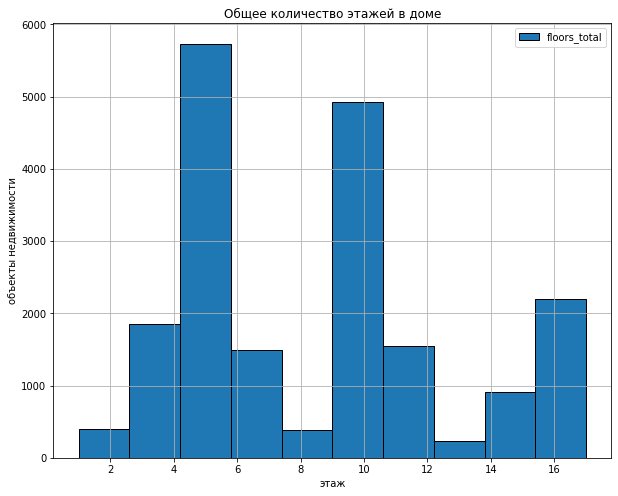

In [66]:
# Рассчитаем Q1, Q3 и IQR для построения графика без выбросов
q1 = data['floor'].quantile(.25) # первый квартиль Q1
q3 = data['floor'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR


# Построим гистограмму общего кол-ва этажей в доме
data['floors_total'].hist(bins=10, range=(1, (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Общее количество этажей в доме')
plt.xlabel('этаж')
plt.ylabel('объекты недвижимости')
plt.show()

***Рассматриваемый диапазон с 1 по 17 этаж, исключая некорректные значения и выбросы. Большинство объектов недвижимости - это 5-ти , 9-ти этажки. Остальные варианты представлены реже. Среднее 10 этаж и медиана 9 этаж.***

##### Расстояние до центра города в метрах

In [67]:
# Выведем описательную статистику для столбца
data['city_centers_nearest'].describe()

count    23529.000000
mean     13933.199222
std       7552.540074
min        181.000000
25%      10935.000000
50%      13098.500000
75%      15233.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

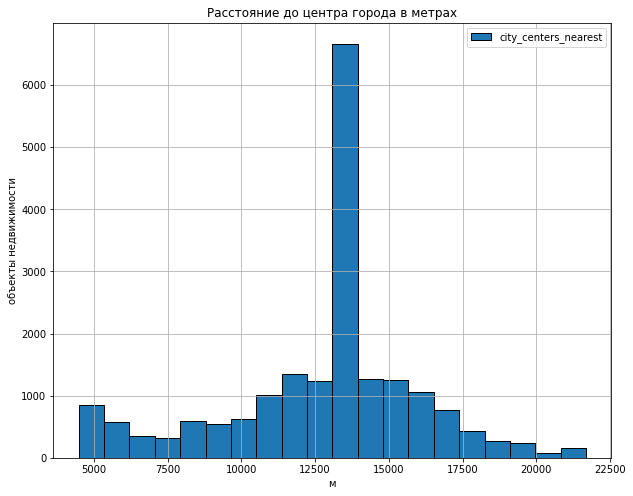

In [68]:
# Рассчитаем Q1, Q3 и IQR для построения графика без выбросов
q1 = data['city_centers_nearest'].quantile(.25) # первый квартиль Q1
q3 = data['city_centers_nearest'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR


# Построим гистограмму этажа квартиры
data['city_centers_nearest'].hist(bins=20, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Расстояние до центра города в метрах')
plt.xlabel('м')
plt.ylabel('объекты недвижимости')
plt.show()

***Рассматриваемый диапазон с 3000 до 22000 м, исключая некорректные значения и выбросы. Большинство объектов недвижимости расположены на удалении 13-14 км от центра. Остальные варианты представлены реже. Среднее 13,9 км и медиана 13 км.***

##### Расстояние до ближайшего аэропорта

In [69]:
# Уберем значения равные 0 
data = data.query('airports_nearest != 0')

In [70]:
# Выведем описательную статистику для столбца
data['airports_nearest'].describe()

count    18026.00000
mean     28826.30689
std      12639.69522
min       6450.00000
25%      18567.00000
50%      26773.00000
75%      37334.75000
max      84869.00000
Name: airports_nearest, dtype: float64

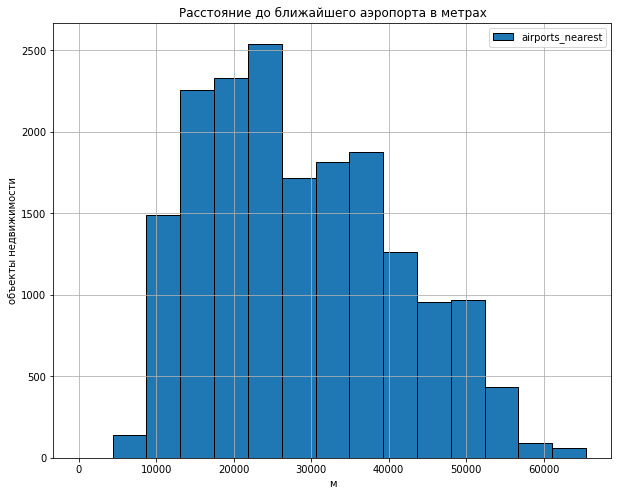

In [71]:
# Рассчитаем Q1, Q3 и IQR для построения графика без выбросов
q1 = data['airports_nearest'].quantile(.25) # первый квартиль Q1
q3 = data['airports_nearest'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR


# Построим гистограмму этажа квартиры
data['airports_nearest'].hist(bins=15, range=(0, (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Расстояние до ближайшего аэропорта в метрах')
plt.xlabel('м')
plt.ylabel('объекты недвижимости')
plt.show()

***Рассматриваемый диапазон с 0 до 65000 м. Большинство объектов недвижимости расположены на удалении от аэропорта на расстоянии 15-25 км. Ближайший к аэропорту объект на расстоянии 6,5 км. Среднее 28,8 км и медиана 26,7 км.***

##### Расстояние до ближайшего парка в метрах

In [72]:
data.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_square_meter,exposition_weekday,exposition_month,exposition_year,floor_category,city_centers_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0


In [73]:
# Посмотрим описательную статистику
data['parks_nearest'].describe().T

count    8023.000000
mean      490.886576
std       343.182920
min         1.000000
25%       287.000000
50%       454.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

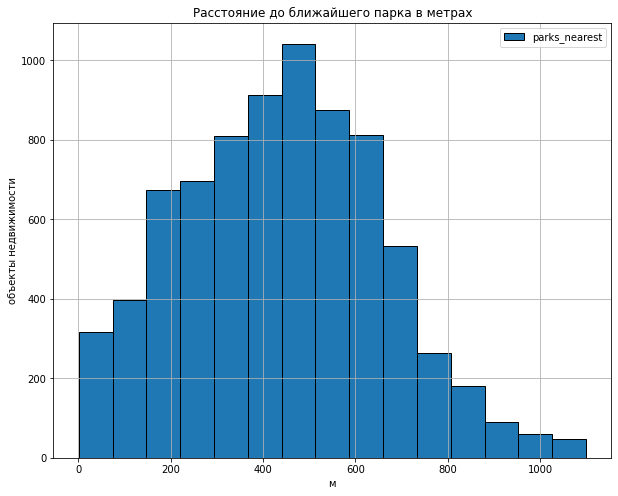

In [74]:
# Рассчитаем Q1, Q3 и IQR для построения графика без выбросов
q1 = data['parks_nearest'].quantile(.25) # первый квартиль Q1
q3 = data['parks_nearest'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR


# Построим гистограмму этажа квартиры
data['parks_nearest'].hist(bins=15, range=(1, (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Расстояние до ближайшего парка в метрах')
plt.xlabel('м')
plt.ylabel('объекты недвижимости')
plt.show()

***Рассматриваемый диапазон с 0 до 1100 м. Большинство объектов недвижимости расположены на удалении от ближайшего парка на расстоянии 400-600м. Ближайшие к парку объект на расстоянии 500м. Среднее 490м и медиана 454м.***

###### День и месяц публикации объявления

День публикации объявления

In [75]:
# Посмотрим описательную статистику
data['exposition_weekday'].describe().T

count    23528.000000
mean         2.568472
std          1.788442
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: exposition_weekday, dtype: float64

In [76]:
# Посмотрим кол-во объявлений по каждому дню недели
data['exposition_weekday'].value_counts().sort_values()

6    1678
5    1930
0    3585
2    3948
4    3970
1    4157
3    4260
Name: exposition_weekday, dtype: int64

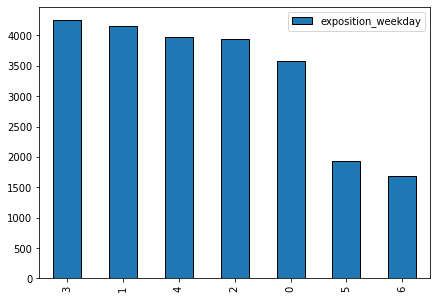

In [77]:
# Отобразим это на графике
data['exposition_weekday'].value_counts().plot.bar(figsize=(7, 5), ec='black', legend=True)
plt.show()

***По графику видно, что чаще всего объявления публиковали в будние дни в середине недели. Реже в выходные дни.***

Месяц публикации объявления

In [78]:
# Посмотрим описательную статистику
data['exposition_month'].describe().T

count    23528.000000
mean         6.400672
std          3.491599
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: exposition_month, dtype: float64

In [79]:
# Посмотрим кол-во объявлений по каждому дню недели
data['exposition_month'].value_counts().sort_values()

5     1263
1     1484
12    1632
7     1684
8     1731
6     1746
9     1968
10    2111
11    2352
4     2361
3     2570
2     2626
Name: exposition_month, dtype: int64

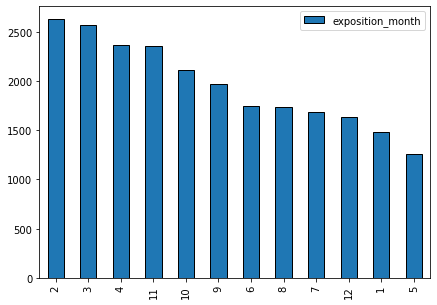

In [80]:
# Отобразим это на графике
data['exposition_month'].value_counts().plot.bar(figsize=(7, 5), ec='black', legend=True)
plt.show()

***По графику видно, что чаще всего объявления публиковали после январских праздников, в феврале. Наименьшие показатели в январе и мае. Можно предположить, что это из-за большого кол-ва выходных и праздничных дней.***

#### Вывод: Мы получили представление о типичном объекте недвижимости из исходных данных: квартира с 1 или 2 комнатами, 5-ти или 9-ти этажка (с квартирой с 1 по 4 этаж),  общей площадью около 45 м², площадью кухни около 5,5 м², с высотой потолков 2,6 м, стоимостью около 3.5 млн.руб, расположенной на удалении от центра на расстоянии 11000-16000 метров, от аэропорта на расстоянии 15000-25000 м, до ближайшего парка около 500 метров.

#### Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.
- Постройте гистограмму.
- Посчитайте среднее и медиану.
- В ячейке типа markdown опишите, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?


Проанализируем время продажи квартиры.

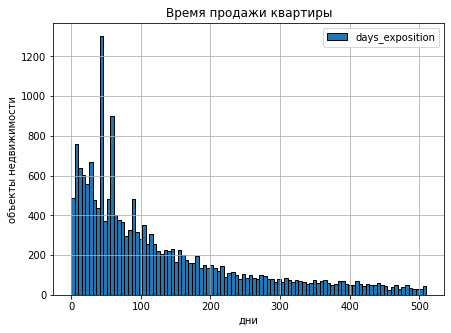

In [81]:
# Рассчитаем Q1, Q3 и IQR для построения графика без выбросов
q1 = data['days_exposition'].quantile(.25) # первый квартиль Q1
q3 = data['days_exposition'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR

# Построим гистограмму времени продажи квартиры
data['days_exposition'].hist(bins=100, range=(0, (q3 + 1.5 * iqr)), figsize=(7, 5), ec='black', legend=True)
plt.title('Время продажи квартиры')
plt.xlabel('дни')
plt.ylabel('объекты недвижимости')
plt.show()

На графике видны пики около 50-60 дней, но при таком длинном "хвосте" из данных делать выводы не уместно. Изменим масштаб - изменим период до 100 дней.

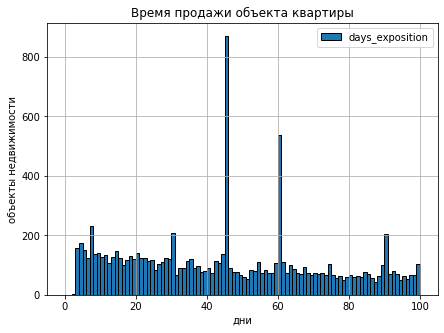

In [82]:
# Ограничим гистограмму периодом до 100 дней
data['days_exposition'].hist(bins=100, range=(0, 100), figsize=(7, 5), ec='black', legend=True)
plt.title('Время продажи объекта квартиры')
plt.xlabel('дни')
plt.ylabel('объекты недвижимости')
plt.show()

***Судя по графику, чаще всего квартиры продают за 45 и 60 дней. Но тут важно учесть, что возможно квартира не продана, а просто закрылось объявление в связи с истекшим сроком публикации. Также объявление может остаться на сайте, даже если объект недвижимости уже фактически продан, просто забыли снять объявление. В этом случае если пользователь не потдвердит актуальность объявления, оно может быть автоматически удалено.***

***Теперь посмотрим на среднее и медиану.***

In [83]:
# Получим описательную статистику столбца days_exposition
data['days_exposition'].describe().T

count    20368.000000
mean       180.840338
std        220.007683
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

***Среднее время продажи объекта недвижимости 181 день, медианное - 95 дней. Максимальное значение - 1580 дней.***
***Смотря на график, можно увидеть длиный "хвост". Больших значений достаточно много. Среднее значение в 2 раза больше медианного. Стандартное отклонение превышает среднее значение - это говорит о большом кол-ве выбросов. Чтобы посмотреть на всю эту красоту нужно построить диаграмму размаха.***

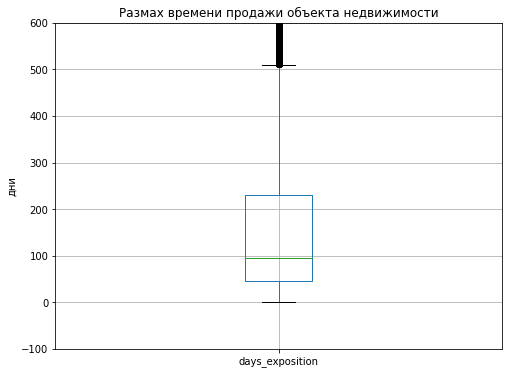

In [84]:
# Строим диаграмму размаха времени продажи объекта недвижимости
data.boxplot(column='days_exposition', figsize=(8, 6))
plt.title('Размах времени продажи объекта недвижимости')
plt.ylim(-100, 600)
plt.ylabel('дни')
plt.show()

In [85]:
# Все, что выше этого значения - это выбросы
print(q3 + 1.5 * iqr)

510.0


In [86]:
len(data)

23528

Обновим датафрейм без выбросов

In [87]:
# Убираем выбросы
data_update = data.query('days_exposition < 510')

# Проверим длину датафрейма
len(data_update)

18694

In [106]:
23528-18694

4834

##### Вывод

***Убрали из датафрейма 4834 строк, которые содержали выбросы по времени продажи объекта. Оценка времени продажи: быстрая продажа - до 45 дней, нормальная продажа - от 45 до 231 дней, долгая продажа - от 231 до 510 дней. Продажи после 510 дней - выбросы.***

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?
Изучите, зависит ли цена от:
-	общей площади;
-	жилой площади;
-	площади кухни;
-	количества комнат;
-	этажа, на котором расположена квартира (первый, последний, другой);
-	даты размещения (день недели, месяц, год).

Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.


***Воспользуемся библиотекой seaborn и красивым графиком heatmap***

In [89]:
# Выведем названия столбцов
data_update.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition', 'price_one_square_meter',
       'exposition_weekday', 'exposition_month', 'exposition_year',
       'floor_category', 'city_centers_nearest_km'],
      dtype='object')

In [90]:
# Создадим список с параметрами для проверки
corr_param = [
    'last_price',
    'total_area',
    'rooms',
    'city_centers_nearest',
    'exposition_weekday',
    'exposition_month',
    'exposition_year']

In [91]:
# Список с названиями параметров
corr_labels = [
    'стоимость квартиры',
    'общая площадь квартиры',
    'количество комнат',
    'расстояние\nдо центра города',
    'публикация объявления\nдень',
    'публикация объявления\nмесяц',
    'публикация объявления\nгод']

# Получаем матрицу корреляции
corr_matrix = data_update[corr_param].corr()
# Выведем на экран
display(corr_matrix)

,last_price,total_area,rooms,city_centers_nearest,exposition_weekday,exposition_month,exposition_year
last_price,1.000000,0.629766,0.342094,-0.168018,0.005379,0.003770,-0.037548
total_area,0.629766,1.000000,0.756218,-0.193496,0.001310,0.001462,-0.072144
rooms,0.342094,0.756218,1.000000,-0.147056,0.000079,-0.000639,-0.064329
city_centers_nearest,-0.168018,-0.193496,-0.147056,1.000000,0.003230,-0.011743,0.012703
exposition_weekday,0.005379,0.001310,0.000079,0.003230,1.000000,0.012852,-0.002274
exposition_month,0.003770,0.001462,-0.000639,-0.011743,0.012852,1.000000,-0.223054
exposition_year,-0.037548,-0.072144,-0.064329,0.012703,-0.002274,-0.223054,1.000000


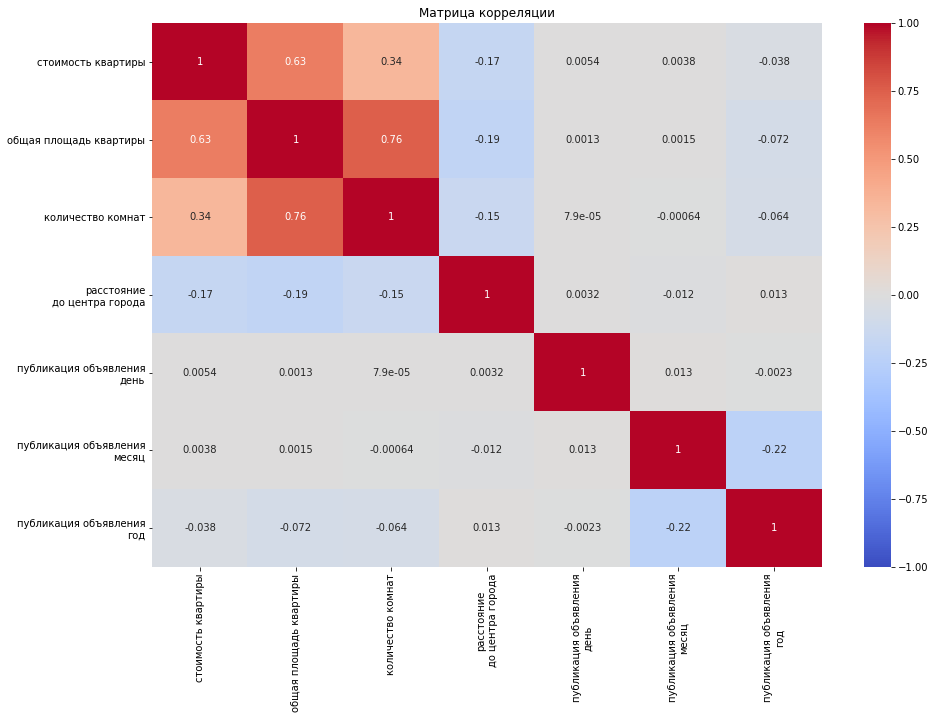

In [92]:
# Визуализируем матрицу корреляции
plt.figure(figsize = (15, 10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1,
            cmap='coolwarm', annot=True,
            yticklabels=corr_labels,
            xticklabels=corr_labels)
plt.title('Матрица корреляции')
plt.show()

***Вывод:***

***Видно, что наибольшая положительная линейная связь между стоимостью квартиры и ее площадью. Зависимость прямопропорциональная - чем больше стоимость квартиры, тем больше ее площадь. Положительная линейная связь отмечается также между стоимостью квартиры и количеством комнат. Связь отличается примерно в 2 раза от связи между стоимостью квартиры и площадтю. Соответственно чем количество комнат больше, тем больше стоимость квартиры. Слабую отрициательную линейную связь можно заметить между стоимостью квартиры и расстоянием до центра города. Чем меньше расстояние до центра, тем больше стоимость квартиры. Между стоимостью квартиры и днем недели, месяцем или годом размещения объявления также отсутствует линейная связь.***

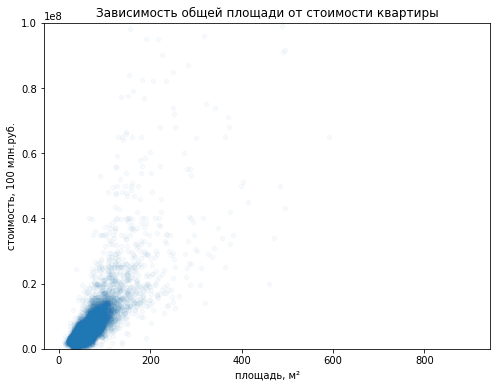

In [93]:
# используем тип графика scatter
data_update.plot(x='total_area', y ='last_price', kind ='scatter', figsize=(8, 6), legend=True, alpha = 0.03)

plt.title('Зависимость общей площади от стоимости квартиры')
plt.xlabel('площадь, м²')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

***Из графика видно, что больше всего данных для квартир стоимостью до 20 млн. руб. и площадью до 150 кв.м. Зависимость прямопропорциональная - чем больше площадь квартиры, тем выше цена.***

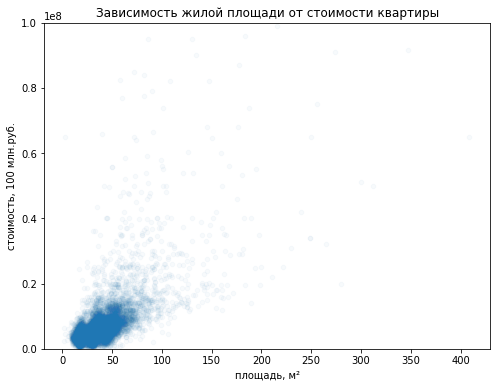

In [94]:
# используем тип графика scatter
data_update.plot(x='living_area', y ='last_price', kind ='scatter', figsize=(8, 6), legend=True, alpha = 0.03)

plt.title('Зависимость жилой площади от стоимости квартиры')
plt.xlabel('площадь, м²')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

***Из графика видно, что больше всего данных для квартир стоимостью до 20 млн. руб. и жило площадью до 75 м². Зависимость прямопропорциональная - чем больше жилаяплощадь квартиры, тем выше ее стоимость.***

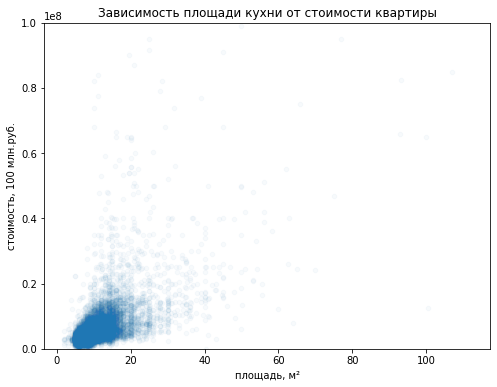

In [95]:
# используем тип графика scatter
data_update.plot(x='kitchen_area', y ='last_price', kind ='scatter', figsize=(8, 6), legend=True, alpha = 0.03)

plt.title('Зависимость площади кухни от стоимости квартиры')
plt.xlabel('площадь, м²')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

***Из графика видно, что больше всего данных для квартир стоимостью до 20 млн. руб. и площадью кухни до 18 м². Зависимость прямопропорциональная - чем больше площадь кухни, тем выше ее стоимость.***

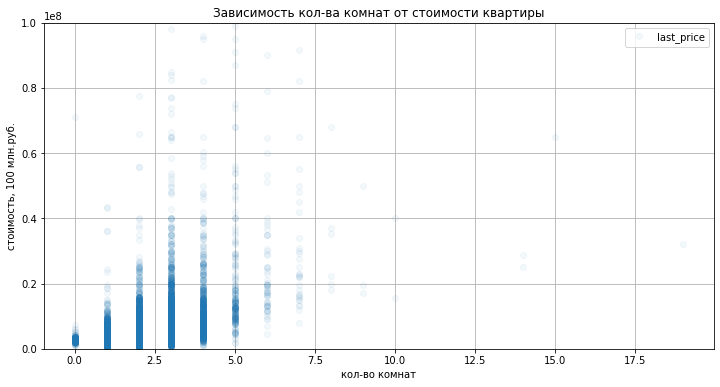

In [96]:
data_update.plot(x = 'rooms', y = 'last_price', style='o', grid=True, figsize=(12, 6), alpha=0.05)
plt.title('Зависимость кол-ва комнат от стоимости квартиры')
plt.xlabel('кол-во комнат')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

***Из графика видно, что больше всего данных для квартир стоимостью до 20 млн. руб и кол-вом комнат от 1 до 3. Для этого диапазона: с учеличение числа комнат до 3 комнат стоимость квартир растет, от 3 до 4 - цена примерно одинаковая, для 5 комнат стоимость снижается. Это можно объяснить тем, что в старом фонде есть 5-ти комнатные квартиры с маленькой площадью комнат.***

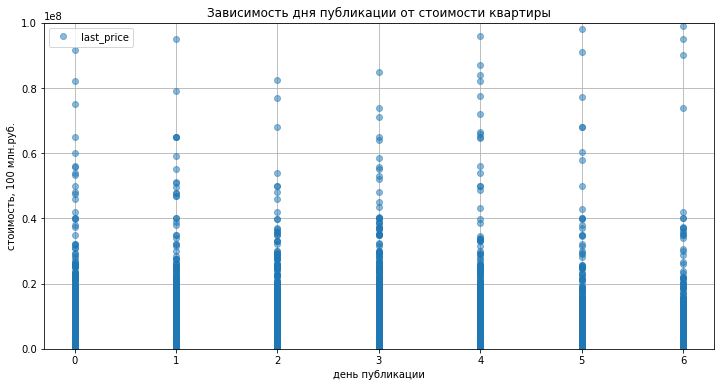

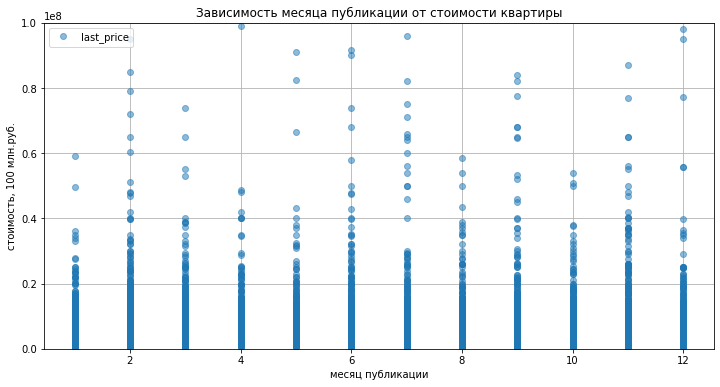

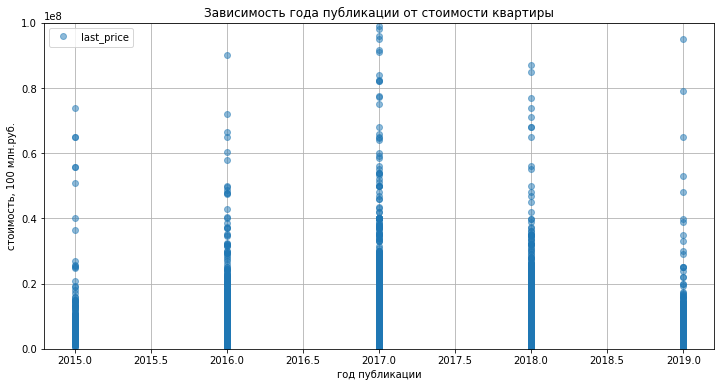

In [97]:
# график дня недели от стоимости
data_update.plot(x = 'exposition_weekday', y = 'last_price', style='o', grid=True, figsize=(12, 6), alpha=0.5)
plt.title('Зависимость дня публикации от стоимости квартиры')
plt.xlabel('день публикации')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

# график месяца от стоимости
data_update.plot(x = 'exposition_month', y = 'last_price', style='o', grid=True, figsize=(12, 6), alpha=0.5)
plt.title('Зависимость месяца публикации от стоимости квартиры')
plt.xlabel('месяц публикации')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

#график года от стоимости
data_update.plot(x = 'exposition_year', y = 'last_price', style='o', grid=True, figsize=(12, 6), alpha=0.5)
plt.title('Зависимость года публикации от стоимости квартиры')
plt.xlabel('год публикации')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

***Зависимоть между датой размещения объявления (день недели, месяц, год) и стоимостью квартир отсутствует. Также из ранее построенной матрицы корреляции видно, что Коэффициенты корреляции отрицательные и близки к нулю.***

*Чтобы посмотреть связь между этажом и стоимостью квартиры построим сводную таблицу и визуализируем результаты на графике.*

,mean,count,median
floor_category,,,
другой,6.221423e+06,13935,4650000
первый,4.443680e+06,2226,3799500
последний,6.806838e+06,2533,4200000


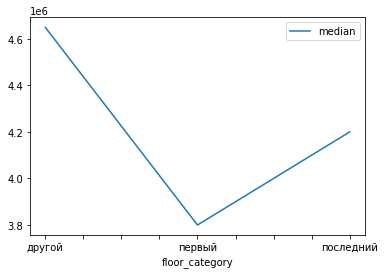

In [98]:
# Создаем сводную таблицу
pivot_table_floor_category = data_update.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
# Присваиваем названия колонкам
pivot_table_floor_category.columns = ['mean', 'count', 'median']
#Строим зависимость
pivot_table_floor_category.plot(y = 'median', legend=True)
#Выводим
pivot_table_floor_category

***Из графика видно, что медианное значение для квартир на первом этаже минимальное. Максимальное медианное значение стоимости квартир - для квартир отличных от первого и последнего этажа.***

#### Общий вывод по пункту 3:

***ВЫВОД: На общую (полную) стоимость объекта больше всего влияет общая площадь квартиры и этаж расположения квартиры. Чем больше площадь, тем выше стоимость. На первом и последнем этажах стоимость квартиры меньше, чем на остальных. Дата публикации объявления на стоимость не влияет***

#### "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name."

In [99]:
#ТОП 10 населенных пунктов с наибольшим числом объявлений
top_10_localities = data_update['locality_name'].value_counts().head(10)
top_10_localities

Санкт-Петербург      12408
посёлок Мурино         518
Кудрово                406
посёлок Шушары         388
Всеволожск             308
Колпино                293
посёлок Парголово      287
Пушкин                 276
Гатчина                244
Выборг                 191
Name: locality_name, dtype: int64

In [100]:
# Выведем среднюю цену за кв м по топ 10 населенным пунктам
top_10_localities_pivot = data_update.query('locality_name in @top_10_localities.index').pivot_table(index='locality_name', values='price_one_square_meter')
top_10_localities_pivot.sort_values(by='price_one_square_meter', ascending=False)

,price_one_square_meter
locality_name,
Санкт-Петербург,111664.992440
Пушкин,101936.484457
Кудрово,94567.754335
посёлок Парголово,89192.878502
посёлок Мурино,85962.868398
посёлок Шушары,77914.528144
Колпино,74768.674642
Всеволожск,68605.620519
Гатчина,68065.179549


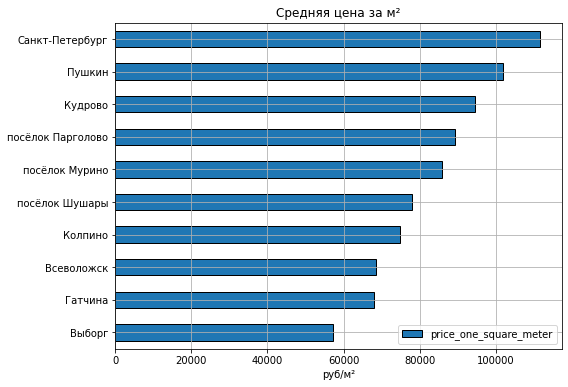

In [101]:
# Отобразим на графике среднюю цену квадратного метра в топ 10 населенных пунктах

top_10_localities_pivot.sort_values(by='price_one_square_meter').plot(kind='barh', legend=True, grid=True, ec='black', figsize=(8, 6))

plt.title('Средняя цена за м²')
plt.xlabel('руб/м²')
plt.ylabel('')
plt.show()

***Вывод: Из графика видно, что наибольшая средняя цена за 1 квадратный метр в Санкт-Петербурге(111722 руб.), что логично. Следом по стоимости идет Пушкин(101894 руб.), что тоже логично - много исторических мест, парков и расположен к городу ближе, чем, например, Гатчина и Выборг. Наименьшая цена за квадратный метр в Выборге(57011 руб.).***

#### Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

In [102]:
# выберем только Санкт-Петербург
df_spb = data_update.query('locality_name == "Санкт-Петербург"')

In [103]:
df_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_square_meter,exposition_weekday,exposition_month,exposition_year,floor_category,city_centers_nearest_km
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0
9,18,5400000,61.0,2017-02-26,3,2.50,9.0,43.6,7,False,...,NaN,0.0,NaN,289.0,88524.59,6,2,2017,другой,15.0
10,5,5050000,39.6,2017-11-16,1,2.67,12.0,20.3,3,False,...,310.0,2.0,553.0,137.0,127525.25,3,11,2017,другой,14.0
15,16,4650000,39.0,2017-11-18,1,2.65,14.0,20.5,5,False,...,590.0,1.0,296.0,19.0,119230.77,5,11,2017,другой,14.0


In [104]:
# посмотрим длину получившегося df
len(df_spb)

12408

12466 Объявлений из Санкт-Петербурга. Определим центр с помощью стоимости квадратного метра. Построим график. Та точка, после которой пойдет явный спад в стоимости и будем считать за границы центра города.

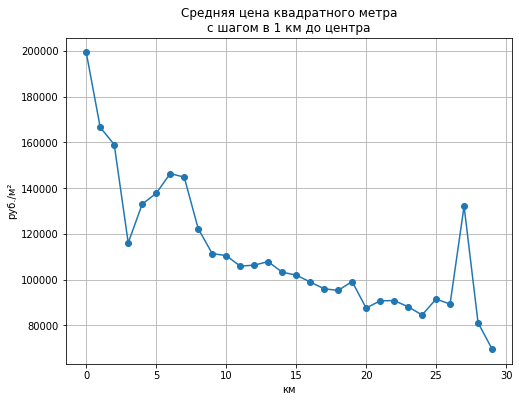

In [105]:
# Рассчитаем среднюю цену квадратного метра до центра
(
df_spb
    .pivot_table(index='city_centers_nearest_km', values='price_one_square_meter')
    .plot(marker='o', grid=True, figsize=(8, 6), legend=False)
)
plt.title('Средняя цена квадратного метра\nс шагом в 1 км до центра')
plt.xlabel('км')
plt.ylabel('руб./м²')
plt.show()

***Из графика можно заметить, что после 8-го километра форма графика становится линейной и стоимость начинается уменьшаться. Максимальная стоимость в зоне у самого центра(до 1 км). Пик в районе 27 км - возможен из-за класса жилья - элитное.***

### Общий вывод

***Наибольшее влияние на стоимость квартиры оказывает её площадь.*** Чем больше площадь квартиры, тем выше её стоимость.
Также на стоимость квартиры влияет и количество комнат. Чем больше комнат, тем выше стоимость.
На стоимость квартиры также влияет расстояние до центра города. Чем ближе квартира располагается к центру, тем выше ее стоимость. *По результатам исследования приняли, что зона центра города распространяется на 8 км.*

***Мы получили представление о типичном объекте недвижимости:*** квартира с 1 или 2 комнатами, 5-ти или 9-ти этажка (с квартирой с 1 по 4 этаж), общей площадью около 45 м², площадью кухни около 5,5 м², с высотой потолков 2,6 м, стоимостью около 3.5 млн.руб, расположенной на удалении от центра на расстоянии 11-16 км, от аэропорта на расстоянии 15-25 км, до ближайшего парка около 500 метров.

*Также установлено:*
- ***Ожидаемое время продажи объекта недвижимости*** - от 45 до 231 день.
- ***Самая высокая средняя стоимость квадратного метра в Санкт-Петербурге*** - 111 722 руб./м² (топ-10 населенных пунктов по количеству объявлений).
- ***Самая низкая средняя стоимость квадратного метра в Выборге*** - 57 011 руб./м² (топ-10 населенных пунктов по количеству объявлений).

**Чек-лист выполнения проекта**

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод